# 7호선 요일별 승하차 패턴분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/CARD_SUBWAY_MONTH_202505 (1).csv', index_col= False)
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250501,분당선,야탑,17571,18765,20250504
1,20250501,8호선,석촌,6970,8042,20250504
2,20250501,분당선,서현,16548,17173,20250504
3,20250501,경부선,독산,8851,8507,20250504
4,20250501,경부선,수원,35103,38426,20250504
...,...,...,...,...,...,...
19134,20250531,과천선,선바위,6421,5197,20250603
19135,20250531,공항철도 1호선,영종,4658,5004,20250603
19136,20250531,공항철도 1호선,인천공항2터미널,10249,7316,20250603
19137,20250531,공항철도 1호선,인천공항1터미널,16395,15278,20250603


In [10]:
print(df.head())
print(df.describe())
print(df.isnull().sum())

        사용일자  노선명  역명  승차총승객수  하차총승객수        요일
0 2025-05-01  분당선  야탑   17571   18765  Thursday
1 2025-05-01  8호선  석촌    6970    8042  Thursday
2 2025-05-01  분당선  서현   16548   17173  Thursday
3 2025-05-01  경부선  독산    8851    8507  Thursday
4 2025-05-01  경부선  수원   35103   38426  Thursday
                                사용일자         승차총승객수         하차총승객수
count                          19139   19139.000000   19139.000000
mean   2025-05-16 00:04:35.374889216   11581.145671   11530.513768
min              2025-05-01 00:00:00       1.000000       0.000000
25%              2025-05-08 00:00:00    4108.000000    3985.500000
50%              2025-05-16 00:00:00    8256.000000    7975.000000
75%              2025-05-24 00:00:00   15283.000000   15157.500000
max              2025-05-31 00:00:00  102915.000000  105169.000000
std                              NaN   11518.917971   11697.968781
사용일자      0
노선명       0
역명        0
승차총승객수    0
하차총승객수    0
요일        0
dtype: int64


## 데이터 전처리

In [ ]:
df['사용일자'] = df['사용일자'].astype(str)
df['사용일자'] = pd.to_datetime(df['사용일자'], errors='coerce')    # 사용일자 타입 변환
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2025-05-01,분당선,야탑,17571,18765,20250504
1,2025-05-01,8호선,석촌,6970,8042,20250504
2,2025-05-01,분당선,서현,16548,17173,20250504
3,2025-05-01,경부선,독산,8851,8507,20250504
4,2025-05-01,경부선,수원,35103,38426,20250504
...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,20250603
19135,2025-05-31,공항철도 1호선,영종,4658,5004,20250603
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,20250603
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,20250603


In [ ]:
df['요일'] = df['사용일자'].dt.day_name()   # 요일 컬럼 생성
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2025-05-01,분당선,야탑,17571,18765,20250504,Thursday
1,2025-05-01,8호선,석촌,6970,8042,20250504,Thursday
2,2025-05-01,분당선,서현,16548,17173,20250504,Thursday
3,2025-05-01,경부선,독산,8851,8507,20250504,Thursday
4,2025-05-01,경부선,수원,35103,38426,20250504,Thursday
...,...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,20250603,Saturday
19135,2025-05-31,공항철도 1호선,영종,4658,5004,20250603,Saturday
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,20250603,Saturday
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,20250603,Saturday


In [7]:
df.drop('등록일자', axis=1, inplace=True) # 불필요 데이터 제거
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,요일
0,2025-05-01,분당선,야탑,17571,18765,Thursday
1,2025-05-01,8호선,석촌,6970,8042,Thursday
2,2025-05-01,분당선,서현,16548,17173,Thursday
3,2025-05-01,경부선,독산,8851,8507,Thursday
4,2025-05-01,경부선,수원,35103,38426,Thursday
...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,Saturday
19135,2025-05-31,공항철도 1호선,영종,4658,5004,Saturday
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,Saturday
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,Saturday


In [ ]:
line_7_df = df[df['노선명'] == '7호선'].copy()  #7호선 데이터 필터링

In [20]:
print("7호선 데이터 상위 5행:")
print(line_7_df.head())
print(f"\n7호선 데이터 총 행 수: {len(line_7_df)} 행")
print("\n7호선 데이터 정보:")
line_7_df.info()

7호선 데이터 상위 5행:
          사용일자  노선명   역명  승차총승객수  하차총승객수        요일
339 2025-05-01  7호선   장암    1628     983  Thursday
340 2025-05-01  7호선  도봉산    5776    7022  Thursday
341 2025-05-01  7호선  수락산    9117    8727  Thursday
342 2025-05-01  7호선   마들    9875    9232  Thursday
343 2025-05-01  7호선   노원   16863   17483  Thursday

7호선 데이터 총 행 수: 1303 행

7호선 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, 339 to 18924
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    1303 non-null   datetime64[ns]
 1   노선명     1303 non-null   object        
 2   역명      1303 non-null   object        
 3   승차총승객수  1303 non-null   int64         
 4   하차총승객수  1303 non-null   int64         
 5   요일      1303 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 71.3+ KB


# 승하차 패턴 분석

In [26]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
line_7_df['요일'] = pd.Categorical(line_7_df['요일'], categories=weekday_order, ordered=True)
line_7_daily_total = line_7_df.groupby('요일', observed=False)[['승차총승객수', '하차총승객수']].sum().reset_index()
print("\n7호선 요일별 총 승하차객수:")
print(line_7_daily_total)


7호선 요일별 총 승하차객수:
          요일   승차총승객수   하차총승객수
0     Monday  2402801  2374506
1    Tuesday  2454839  2428169
2  Wednesday  2817457  2794636
3   Thursday  3202852  3164562
4     Friday  3444130  3378407
5   Saturday  2297391  2202811
6     Sunday  1481458  1441585


C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\60591688.py:10: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\60591688.py:10: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\60591688.py:10: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\60591688.py:10: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\60591688.py:10: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\60591688.py:10: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) Deja

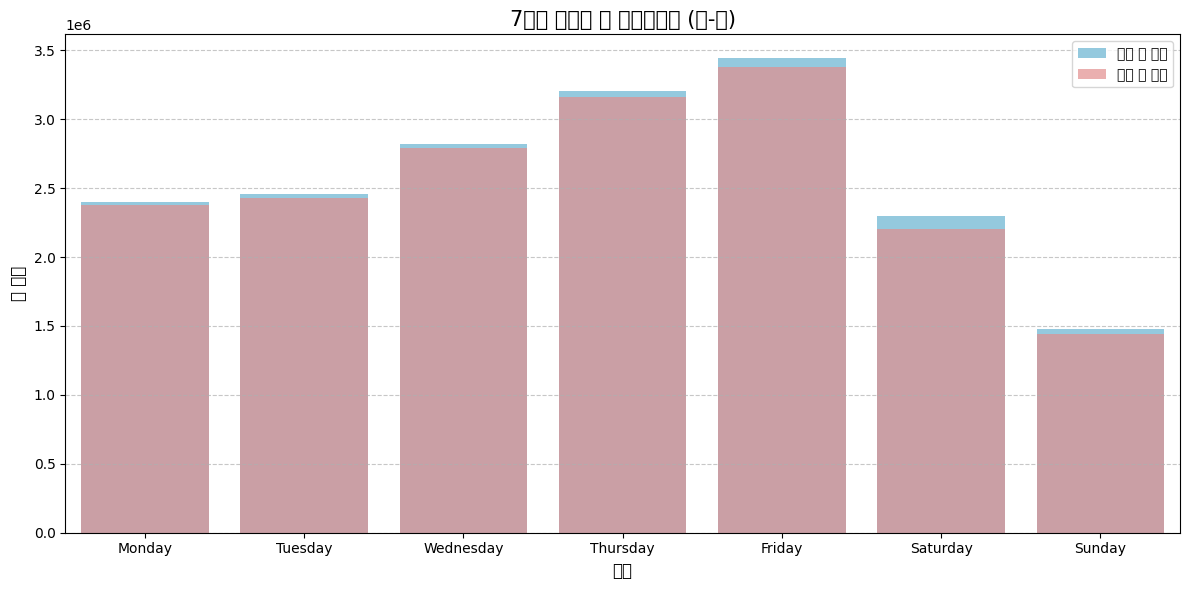

In [27]:
# 요일벼 총 승하차승객수 시각화 
plt.figure(figsize=(12, 6))
sns.barplot(x='요일', y='승차총승객수', data=line_7_daily_total, color='skyblue', label='승차 총 객수')
sns.barplot(x='요일', y='하차총승객수', data=line_7_daily_total, color='lightcoral', label='하차 총 객수', alpha=0.7)
plt.title('7호선 요일별 총 승하차객수 (월-일)', fontsize=15)
plt.xlabel('요일', fontsize=12)
plt.ylabel('총 객수', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()